# Airlines Flights Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


df = pd.read_csv("C:/Dataset-DS/airlines_flights_data.csv")
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Columns Information:
1. airline : name of the airline company
2. flight : code of the plane
3. source_city : departure city
4. departure_time : time of the day as in morning, evening
5. stops : count of stops taken by flight to reach the destination
6. arrival_time : time of the day when reached
6. destination_city : destination to be reached by the flight
7. class : passenger ticket class
8. duration : time taken to reach the destination
10. price : ticket price

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


1. index column is just the row number hence it can be droppped

there is no null value in columns

In [3]:
df = df.drop(columns='index' ,axis= 1)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df.duplicated().sum()

0

there are no duplicate or null values in the dataset

## Q.1. What are the airlines in the dataset, accompanied by their frequencies?

In [33]:
df[df['airline'] == 'Vistara'].value_counts().sum()

127859

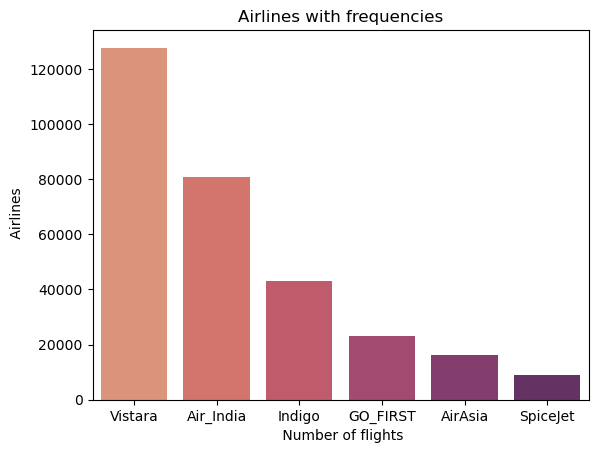

In [6]:
sns.barplot(x = df['airline'].value_counts().index, y = df['airline'].value_counts().values, palette='flare')

plt.title("Airlines with frequencies")
plt.xlabel(" Number of flights")
plt.ylabel(" Airlines")
plt.show()


Vistara has had the most number of flights i.e. 127859 flights

## Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.

In [7]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [8]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

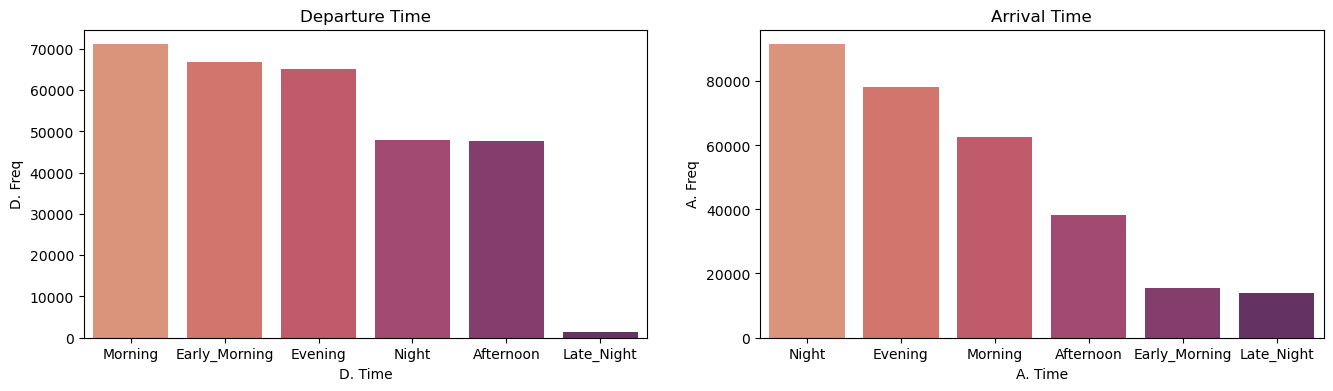

In [9]:
plt.figure(figsize=(16, 4))

plt.subplot(1 , 2 ,1)
sns.barplot(x = df['departure_time'].value_counts().index, y = df['departure_time'].value_counts().values, palette='flare')
plt.title("Departure Time")
plt.xlabel("D. Time")
plt.ylabel("D. Freq")


plt.subplot(1 , 2 ,2)
sns.barplot(x = df['arrival_time'].value_counts().index, y = df['arrival_time'].value_counts().values, palette='flare')
plt.title("Arrival Time")
plt.xlabel("A. Time")
plt.ylabel("A. Freq")


plt.show()

71146 Flights have departed at Morning and 91538 Flights have arrived at Night.
Hence we can say that most flights depart at Morning time and arrive at Night time

## Q.3. Show Bar Graphs representing the Source City & Destination City

In [34]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [35]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

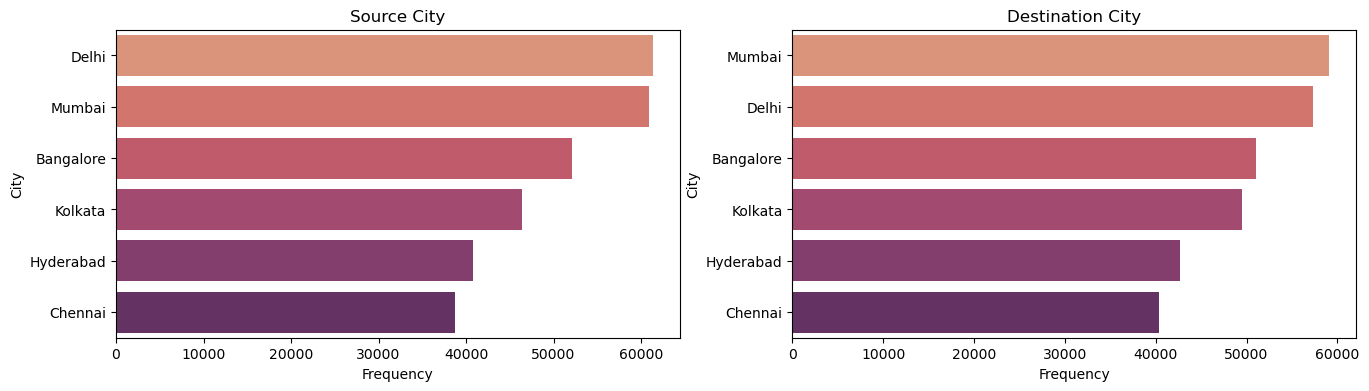

In [38]:
plt.figure(figsize=(16, 4))

plt.subplot(1 , 2 ,1)
sns.barplot(y = df['source_city'].value_counts().index, x = df['source_city'].value_counts().values, palette='flare')
plt.title("Source City")
plt.xlabel("Frequency")
plt.ylabel("City")


plt.subplot(1 , 2 ,2)
sns.barplot(y = df['destination_city'].value_counts().index, x = df['destination_city'].value_counts().values, palette='flare')
plt.title("Destination City")
plt.xlabel("Frequency")
plt.ylabel("City")


plt.show()

61343 Flights leave from delhi and 60896 from Mumbai which are the highest.
59097 Flights arrive to Mumbai which is the highest

## Q.4. Does price varies with airlines ?

In [11]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [79]:
df[df['class'] == 'Economy'].groupby('airline')['price'].mean()

airline
AirAsia      4091.072742
Air_India    7313.682169
GO_FIRST     5652.007595
Indigo       5324.216303
SpiceJet     6179.278881
Vistara      7806.943645
Name: price, dtype: float64

In [74]:
df[df['class'] == 'Business'].groupby('airline')['price'].mean()

airline
Air_India    47131.039212
Vistara      55477.027777
Name: price, dtype: float64

In [93]:
AirIndia_diff = df[(df['class'] == 'Business') & (df['airline'] == 'Air_India')]['price'].mean().round(2) \
                -  df[(df['class'] == 'Economy') & (df['airline'] == 'Air_India')]['price'].mean().round(2)  

Percent_Air_India = (AirIndia_diff * 100) \
            // (df[(df['class'] == 'Economy') & (df['airline'] == 'Air_India')]['price'].mean().round(2) \
            + df[(df['class'] == 'Business') & (df['airline'] == 'Air_India')]['price'].mean().round(2))

int(Percent_Air_India)

73

In [94]:
Vistara_diff = df[(df['class'] == 'Business') & (df['airline'] == 'Vistara')]['price'].mean().round(2) \
                -  df[(df['class'] == 'Economy') & (df['airline'] == 'Vistara')]['price'].mean().round(2)  

Percent_Vistara = (Vistara_diff * 100) \
            // (df[(df['class'] == 'Economy') & (df['airline'] == 'Vistara')]['price'].mean().round(2) \
            + df[(df['class'] == 'Business') & (df['airline'] == 'Vistara')]['price'].mean().round(2))

int(Percent_Vistara)

75

In [75]:
airlineVSprice = df.groupby(['airline', 'class'])['price'].mean().round(2)
print(airlineVSprice)

airline    class   
AirAsia    Economy      4091.07
Air_India  Business    47131.04
           Economy      7313.68
GO_FIRST   Economy      5652.01
Indigo     Economy      5324.22
SpiceJet   Economy      6179.28
Vistara    Business    55477.03
           Economy      7806.94
Name: price, dtype: float64


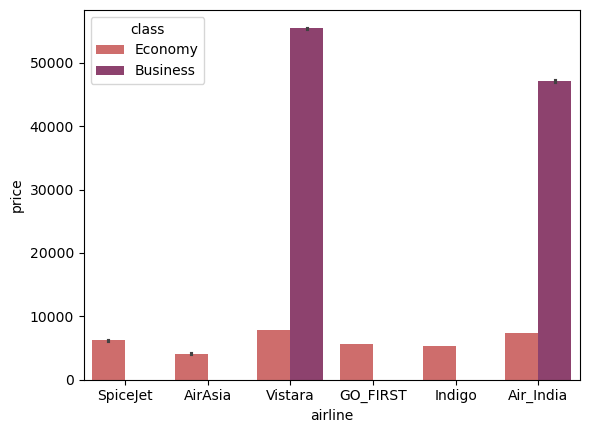

In [13]:
sns.barplot(x = df['airline'], y = df['price'] , hue=df['class'], palette='flare')
plt.show()

For Economy class : Vistara's prices are the highest.

Only Vistara and Air India has the business class both of them charge around 75% and 73% respectively more than their economy class

## Q.5. Does ticket price change based on the departure time and arrival time?

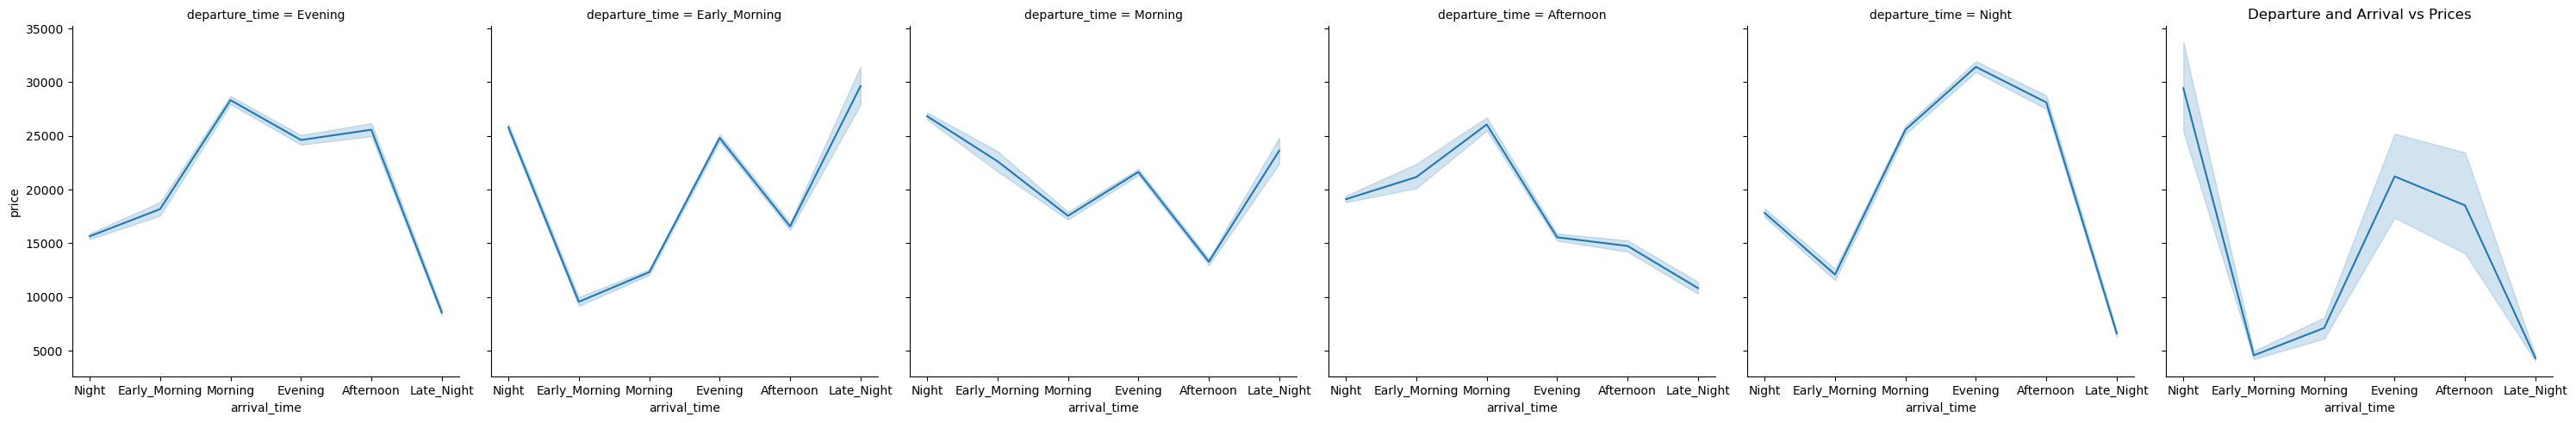

In [199]:
sns.relplot( x = 'arrival_time', y = 'price', data = df, col = 'departure_time', kind = 'line')
plt.title("Departure and Arrival vs Prices")
plt.show()

## Q.6. How the price changes with change in Source and Destination?

In [15]:
df.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

In [16]:
df.groupby('destination_city')['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

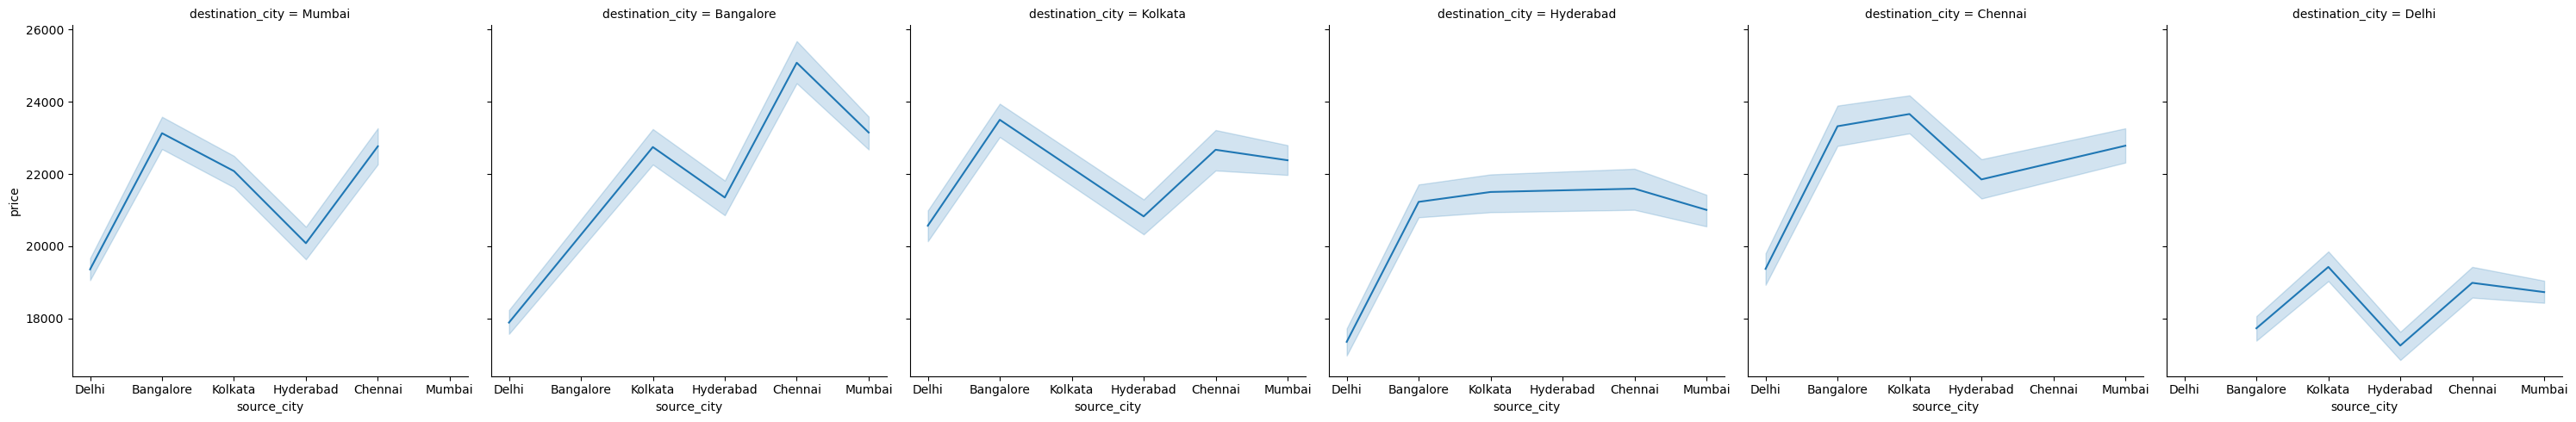

In [17]:
sns.relplot(x = 'source_city',y='price' , col='destination_city', data=df, kind='line')
plt.show()

## Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [18]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [19]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [200]:
priceVSday = df.sort_values(by='price', ascending=False)[df['days_left'].isin([1, 2])]
priceVSday

C:\Users\91755\AppData\Local\Temp\ipykernel_16116\3349573741.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  priceVSday = df.sort_values(by='price', ascending=False)[df['days_left'].isin([1, 2])]


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
230092,Vistara,UK-996,Mumbai,Evening,one,Evening,Bangalore,Business,22.50,2,114523
219183,Vistara,UK-707,Delhi,Evening,two_or_more,Night,Hyderabad,Business,27.42,2,114507
215858,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434
241548,Vistara,UK-996,Mumbai,Evening,one,Evening,Chennai,Business,21.83,2,111964
...,...,...,...,...,...,...,...,...,...,...,...
115603,Indigo,6E-541,Bangalore,Morning,zero,Morning,Chennai,Economy,1.17,2,3498
115601,SpiceJet,SG-4009,Bangalore,Early_Morning,zero,Early_Morning,Chennai,Economy,1.08,2,3497
193851,Indigo,6E-847,Chennai,Evening,zero,Evening,Bangalore,Economy,1.08,2,3362
193850,SpiceJet,SG-4010,Chennai,Morning,zero,Morning,Bangalore,Economy,1.33,2,3361


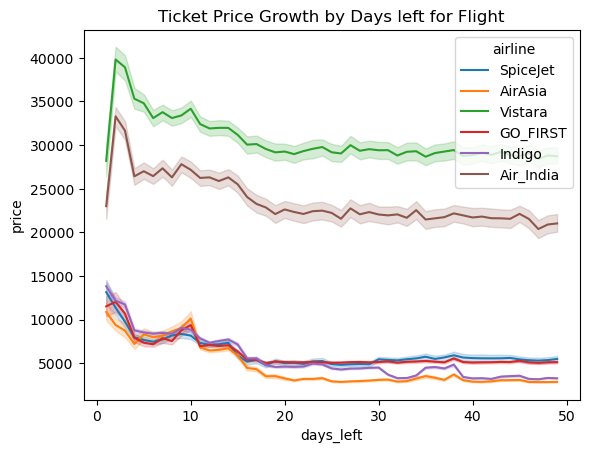

In [134]:
sns.lineplot(data=df, x = 'days_left', y='price', hue='airline')
plt.title("Ticket Price Growth by Days left for Flight")
plt.show()

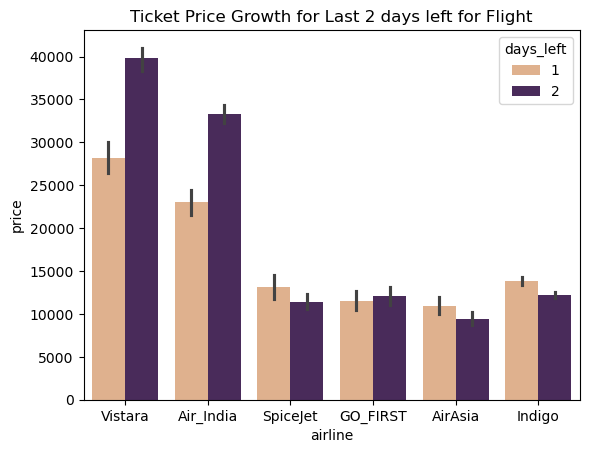

In [136]:
ax = sns.barplot(data=priceVSday, x='airline', y='price', hue='days_left', palette='flare')
plt.title("Ticket Price Growth for Last 2 days left for Flight")
plt.show()

Prices are are maximum on the last 2 days. Air India and Vistara charges significantly more amount than any other airlines on last 2 days. But prices seem to drop on last day and they are highest on last second day.

## Q.8. How does the ticket price vary between Economy and Business class?

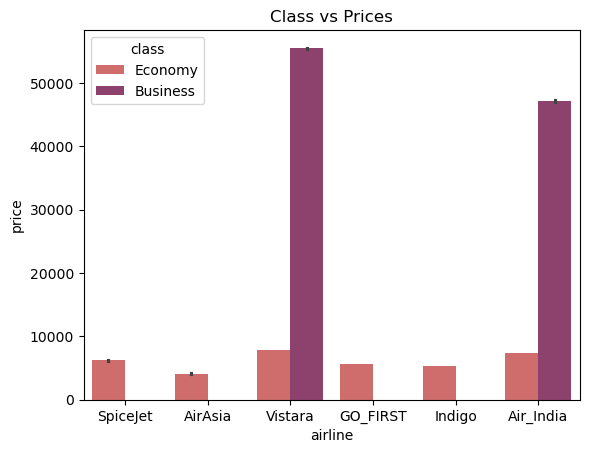

In [202]:
sns.barplot(data=df, x = 'airline', y='price', hue='class', palette='flare')
plt.title("Class vs Prices")
plt.show()

Vistara charges 75% more for its business class than its economy class tickets

Air India charges 73% more for its business class than its economy class tickets

## Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

In [190]:
Vistara_Del_Hy = df[(df['airline'] == 'Vistara') & (df['class'] == 'Business') & (df['source_city'] == 'Delhi') & (df['destination_city'] == 'Hyderabad')]
Vistara_Del_Hy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113
...,...,...,...,...,...,...,...,...,...,...,...
221863,Vistara,UK-963,Delhi,Morning,one,Early_Morning,Hyderabad,Business,23.00,49,53937
221864,Vistara,UK-985,Delhi,Evening,one,Early_Morning,Hyderabad,Business,12.00,49,59537
221865,Vistara,UK-985,Delhi,Evening,one,Afternoon,Hyderabad,Business,16.42,49,59537
221866,Vistara,UK-955,Delhi,Evening,one,Early_Morning,Hyderabad,Business,14.08,49,61889


C:\Users\91755\AppData\Local\Temp\ipykernel_16116\551681991.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = Vistara_Del_Hy, x = 'flight' , y = 'price',palette='flare')


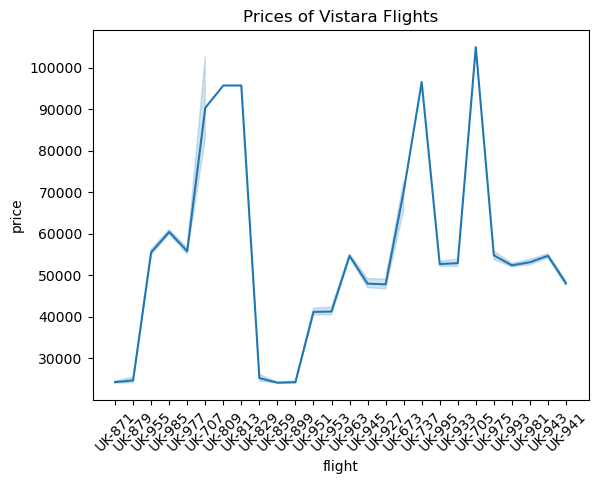

In [188]:
sns.lineplot(data = Vistara_Del_Hy, x = 'flight' , y = 'price',palette='flare')
plt.xticks(rotation=45) 
plt.title("Prices of Vistara Flights")
plt.show()

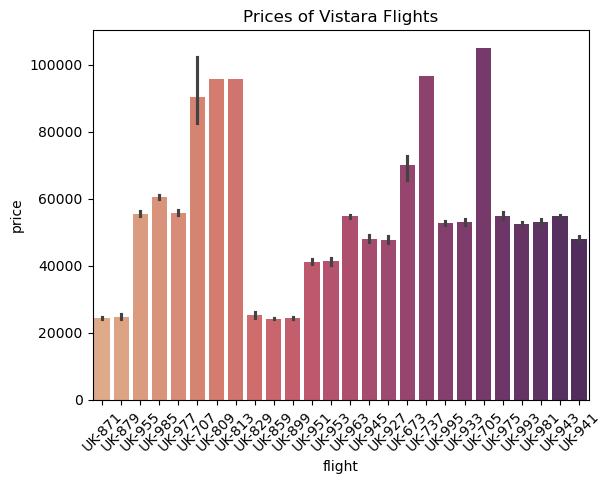

In [189]:
sns.barplot(data = Vistara_Del_Hy, x = 'flight' , y = 'price',palette='flare')
plt.xticks(rotation=45) 
plt.title("Prices of Vistara Flights")
plt.show()

In [197]:
priceVistara = df['price'][(df['airline'] == 'Vistara') & (df['class'] == 'Business') & (df['source_city'] == 'Delhi') & (df['destination_city'] == 'Hyderabad')]

In [196]:
priceVistara.describe()

count      1660.000000
mean      47939.840361
std       11856.129244
min       24056.000000
25%       46097.000000
50%       51697.000000
75%       53937.000000
max      114507.000000
Name: price, dtype: float64

Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class is Rs. 47940 with minimum price Rs. 24056 and maximum price of Rs. 1,14,507